# Homework 5

In [1]:
import math
import numpy as np
import pandas as pd
#from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
# 加载数据函数
def loadData(filename):
    data = pd.read_csv(filename, sep='\s+', header=None)
    data = data.as_matrix()
    col, row = data.shape
    X = np.c_[np.ones((col, 1)), data[:, 1: row]]
    Y = data[:, 0]
    return X, Y

In [3]:
# 误差计算函数
def mistake(yhat, y):
    err = np.sum(yhat != y)/len(y)
    return err

In [4]:
# 导入数据
X, Y = loadData('features_train.dat')
Xtest, Ytest = loadData('features_test.dat')
row, col = X.shape

## Q15

w:  [[  0.00000000e+00   6.00766054e-05   3.95350000e-06]]
w:  [[ 0.          0.00601009  0.00032659]]
w:  [[ -1.77635684e-15   5.70727340e-01   2.59535779e-02]]
w:  [[  0.          11.31692273   0.50277148]]
w:  [[  1.45519152e-11   1.30809653e+01   5.78933050e-01]]


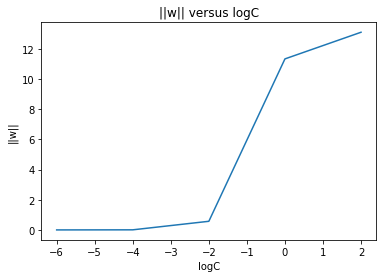

In [5]:
# Q15
Ylabel = Y.copy()
Ylabel[Ylabel != 0] = -1
Ylabel[Ylabel == 0] = 1
logC = [-6, -4, -2, 0, 2]
w = []

for i in range(len(logC)):
    clf = SVC(C=pow(10,logC[i]), kernel='linear', shrinking=False)
    clf.fit(X, Ylabel)
    w.append(np.linalg.norm(clf.coef_))
    print('w: ', clf.coef_)
# plot
plt.plot(logC, w)
plt.xlabel('logC')
plt.ylabel('||w||')
plt.title('||w|| versus logC')
plt.show()

## Q16

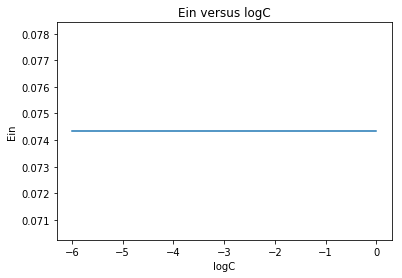

In [6]:
# Q16
Ylabel = Y.copy()
Ylabel[Ylabel != 8] = -1
Ylabel[Ylabel == 8] = 1
logC = [-6, -4, -2, 0]
Ein = []

for i in range(len(logC)):
    clf = SVC(C=pow(10,logC[i]), kernel='poly', degree=2, gamma=1, coef0=1, shrinking=False)
    clf.fit(X, Ylabel)
    Yhat = clf.predict(X)
    Ein.append(mistake(Ylabel, Yhat))
# plot
plt.plot(logC, Ein)
plt.xlabel('logC')
plt.ylabel('Ein')
plt.title('Ein versus logC')
plt.show()

## Q17

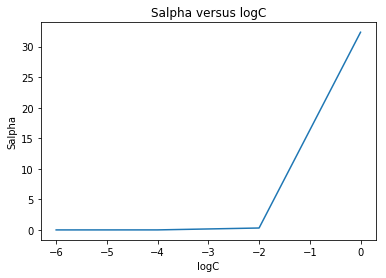

In [7]:
# Q17
Ylabel = Y.copy()
Ylabel[Ylabel != 8] = -1
Ylabel[Ylabel == 8] = 1
logC = [-6, -4, -2, 0]
Salpha = []

for i in range(len(logC)):
    clf = SVC(C=pow(10,logC[i]), kernel='poly', degree=2, gamma=1, coef0=1, shrinking=False)
    clf.fit(X, Ylabel)
    Salpha.append(np.linalg.norm(clf.dual_coef_))
# plot
plt.plot(logC, Salpha)
plt.xlabel('logC')
plt.ylabel('Salpha')
plt.title('Salpha versus logC')
plt.show()

## Q18

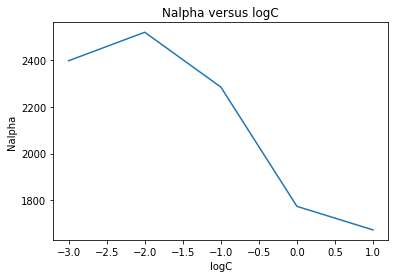

In [8]:
# Q18
Ylabel = Y.copy()
Ylabel[Ylabel != 0] = -1
Ylabel[Ylabel == 0] = 1
logC = [-3, -2, -1, 0, 1]
Nalpha = []

for i in range(len(logC)):
    clf = SVC(C=pow(10,logC[i]), kernel='rbf', gamma=100, shrinking=False)
    clf.fit(X, Ylabel)
    Nalpha.append(np.sum(clf.n_support_))
# plot
plt.plot(logC, Nalpha)
plt.xlabel('logC')
plt.ylabel('Nalpha')
plt.title('Nalpha versus logC')
plt.show()

## Q19

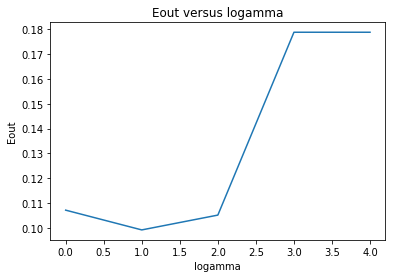

In [9]:
# Q19
Ylabel = Y.copy()
Ylabel[Ylabel != 0] = -1
Ylabel[Ylabel == 0] = 1
Ytestlabel = Ytest.copy()
Ytestlabel[Ytestlabel != 0] = -1
Ytestlabel[Ytestlabel == 0] = 1
logamma = [0, 1, 2, 3, 4]
Eout = []

for i in range(len(logamma)):
    clf = SVC(C=0.1, kernel='rbf', gamma=pow(10,logamma[i]), shrinking=False)
    clf.fit(X, Ylabel)
    yhat = clf.predict(Xtest)
    Eout.append(mistake(yhat, Ytestlabel))
# plot
plt.plot(logamma, Eout)
plt.xlabel('logamma')
plt.ylabel('Eout')
plt.title('Eout versus logamma')
plt.show()

## Q20

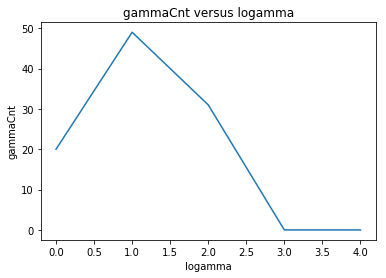

In [11]:
# Q20
Ylabel = Y.copy()
Ylabel[Ylabel != 0] = -1
Ylabel[Ylabel == 0] = 1
logamma = [0, 1, 2, 3, 4]
gammaCnt = [0, 0, 0, 0, 0]

for i in range(100):
    minEval = 1
    for j in range(len(logamma)):
        pos = np.random.permutation(row)
        Xval = X[pos[0:1000], :]; Yval = Ylabel[pos[0:1000]]
        Xtrain = X[pos[1000:], :]; Ytrain = Ylabel[pos[1000:]]
        clf = SVC(C=0.1, kernel='rbf', gamma=pow(10,logamma[j]), shrinking=False)
        clf.fit(Xtrain, Ytrain)
        yhat = clf.predict(Xval)
        Eval = mistake(yhat, Yval)
        if Eval < minEval:
            minEval = Eval
            idx = j
    gammaCnt[idx] += 1

# plot
plt.plot(logamma, gammaCnt)
plt.xlabel('logamma')
plt.ylabel('gammaCnt')
plt.title('gammaCnt versus logamma')
plt.show() 